# Exam project Wisconsin Breast Cancer

Group: 25

Members: 
- Sameer Ahmad Habibi
- Kasper Juul Hermansen
- Anton Brix Torø

Due date: 28.05.2019

In [114]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [115]:
%autoreload

# Preparation

import sys,os

path = "/home/hermansen/git/itmal-25f"

sys.path.append(os.path.expanduser(path))

path = "/home/hermansen/git"

sys.path.append(os.path.expanduser(path))

In [116]:
from jupyter_toc_gen import program as toc

# toc.main("Project.ipynb", "g")

# Table of Contents

 - [Journal 2](#Journal-2)
 - [Introduction](#Introduction)
    - [Requirements](#Requirements)
       - [Our requirements](#Our-requirements)
       - [Course Requirements](#Course-Requirements)
    - [Loading the packages](#Loading-the-packages)
    - [The Dataset](#The-Dataset)
       - [Loading the data set](#Loading-the-data-set)
    - [Hypothesis](#Hypothesis)
 - [Body](#Body)
    - [Preparing the data](#Preparing-the-data)
    - [Data Exploration](#Data-Exploration)
    - [Data Visualization](#Data-Visualization)
       - [Data standardization](#Data-standardization)
       - [Feature Selection](#Feature-Selection)
    - [Selecting a Classifier](#Selecting-a-Classifier)
       - [Random Forest Classifier](#Random-Forest-Classifier)
    - [Training the Classifier](#Training-the-Classifier)
       - [Testing the model](#Testing-the-model)
       - [RFE](#RFE)
       - [RFECV](#RFECV)
       - [Tree based feature selection](#Tree-based-feature-selection)
    - [Running PCA](#Running-PCA)
    - [Deep learning](#Deep-learning)
       - [Backpropagation](#Backpropagation)
    - [Results](#Results)
 - [Discussion](#Discussion)
 - [Conclusion](#Conclusion)
 - [Appendix](#Appendix)

# Introduction

This journal will feature the [Wisconsin Breast Cancer set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data), this journal will explain the process of getting the set, visualizing the model, selecting the right features and training a classifier for testing the hypothesis. This will be done with a RandomForestClassifier, and later with a Deep Neural Network. The two very different methods, will then be compared, and a discussion will take place, weighting the two methods against each other. A conclusion will take place, which will refer to the accuracy of our score, and if it's even possible to deny or confirm the hypothesis.

## Requirements

There are two types of requirements, ours and from the course. 

### Our requirements

The project has to be coheesive, and show the process through the entire pipeline, from inception to final model handoff (test of model). As such both Machine learning and Deep learning should be used, to show the benefits and drawbacks of both.

### Course Requirements

- data must be split in training_test set, where the split methods are described in detail
  - preprocessing the data and scaling it
  - explain if advanced methods are used before fitting
- the machine learning algorithm must be described in depth
  - which criteria is used for the model selection
    - reasoning behind choice of algorithm
    - complexity of model explained
    - alternatives from the initial investigation
  - selection of regulizers and optimizers
  - tuning of model hyper-parameters
- the system must include a suitable performance metric
  - scoring the system
  - loss-fuction
- the journal must contain a list of individual contributions
- each group member, must draw an indiviual conclusion on the entire journal, must present individual insights

## Loading the packages

For the project a few important packages are used:

- numpy
  - numpy (nummerical python) is used for data which is contained in matrices, this is especially useful, for applying various algorithms to the set, and gaining insight into the set
- pandas
  - pandas is used for extracting sets from the filesystem, and applying various formats for the data, it is an important data analysis tool for python
- seaborn
  - seaborn augments matplotlib, with various plot, not available in the base
- matplotlib
  - matplotlib is the standard plotting tool for python


In [117]:
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt

## The Dataset

The dataset used for this journal is the [Wisconsin Breast Cancer set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) this is contains various parameters regarding breast cancer, where the tumors themselves are analysed in details, such as texture, concavity, etc. This set is ideal, because it contains a goto hypothesis, is the tumor bening or malign. This is because one of the features are an index, which identifies if the tumor is one or the other. 

### Data Description

1: ID number

2: Diagnosis (M = malignant, B = benign)

3:Ten real-valued features are computed for each cell nucleus:
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

### Loading the data set

In [118]:
data = pd.read_csv('input/data/data.csv')

In [119]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

      ...       texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0     ...               17.33           184.60      2019.0            0.1622   
1     ...               23.41           158.80      1956.0            0.1238   
2     ...               25.53           152.50      1709.0            0.1444   
3     ...               26.50            98.87       567.7            0.2098   
4     ...               16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

## Hypothesis

Above in "The Dataset", the dataset has been loaded, and some initial insight can be gained. The set contains some useful features, and is straight forward to use. The diagnosis is especially important, for this is the end goal, the success scenario is finding out early if the tumor is bening or malignant.  

As such the null-hyposis is it's not possible to identify the tumor diagnosis from the various features, with a confidence value below 5%. 

The goal is to reject the null-hyposis with a one hypothesis or the other

- hypothesis 1: The tumor is bening
- hypothesis 2: the tumor is malignant

Where we can identify one or the other with a certainty of 95% or above (for the wisconsin dataset)

# Body

## Preparing the data

The dataset might contain some fields, that are either unimportant or contain missing data, this section will identify with and handle it.

In [120]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

      ...       texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0     ...               17.33           184.60      2019.0            0.1622   
1     ...               23.41           158.80      1956.0            0.1238   
2     ...               25.53           152.50      1709.0            0.1444   
3     ...               26.50            98.87       567.7            0.2098   
4     ...               16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

From above, a few inconsistencies are shown:

1. Id is useless for our purposes, as normal indexes (positions) are used instead.
2. field 32, Unnamed, this only contains not-a-number values

These fields should be removed, to clean our data. It doesn't look like we've got any other NaN values, as such no handling of those are neccessary.

In [121]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [122]:
y = data.diagnosis
list = ['Unnamed: 32', 'id', 'diagnosis']
x = data.drop(list, axis=1)
x.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean           ...             radius_worst  \
0                 0.07871           ...                    25.38   
1                 0.05667           ...                    24.99   
2                 0.05999           ...                    23.57   
3                 0.09744           ...                    14.91   
4                 0.05883           ...                    22.54   

   texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0          17.33           184.60      2019.0            0.1622   
1          23.41           158.80      1956.0            0.1238   
2          25.53           152.50      1709.0            0.1444   
3          26.50            98.87       567.7            0.2098   
4          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 30 columns]

## Data Exploration

data exploration is about looking at the distribution of each variable using a histogram diagram. The two axes of the histogram are represented so that the horizontal axis presents the data of the feature and the vertical axis presents the frequency of the occurrence. The correlation test is used to evaluate the relationship between two numerical variables. If two variables have a correlation coefficient, the two variables are numerical variables, while the rest are categorized as variables.

Before we go to correlation test, we must make changes to the target setting for classification, in order to make the diagnosis column numerical. In this way, we can include the target for the correlation test, as the correlation test can only process numerical data. 
Another thing that is important to change the target of the dataset because it is need to convert to 0 and 1 to calculate score of our model evaluation.

- M = 1
- B = 0

In [123]:
# Change diagnosis to numerical data M --> 1; B--> 0
from sklearn import preprocessing

lb = preprocessing.LabelBinarizer()
data['diagnosis'] = lb.fit_transform(data['diagnosis'])

In [124]:
# Delete unnecessary features

del data['Unnamed: 32']
del data['id']

In [125]:
data.shape

(569, 31)

There are 31 features now (including the target).

Now we can explore all variables using Pandas Proiling Report. From the histograms, below we can see the distributions are normal.

See appendix for the output

## Data Visualization

In this section, we're going to visualize the data, this includes different relations, correlations, variance, histograms etc.

In [126]:
x.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean           ...             \
count     569.000000              569.000000           ...              
mean        0.181162                0.062798           ...              
std         0.027414                0.007060           ...              
min         0.106000                0.049960           ...              
25%         0.161900                0.057700           ...              
50%         0.179200                0.061540           ...              
75%         0.195700                0.066120           ...              
max         0.304000                0.097440           ...              

       radius_worst  texture_worst  perimeter_worst   area_worst  \
count    569.000000     569.000000       569.000000   569.000000   
mean      16.269190      25.677223       107.261213   880.583128   
std        4.833242       6.146258        33.602542   569.356993   
min        7.930000      12.020000        50.410000   185.200000   
25%       13.010000      21.080000        84.110000   515.300000   
50%       14.970000      25.410000        97.660000   686.500000   
75%       18.790000      29.720000       125.400000  1084.000000   
max       36.040000      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 30 columns]

Above we've described the dataset, extracting various important variables from the different features. This is very useful, but not that intuitive, as it's difficult to get value of, of these variables. As such a number of plots are used to gain insight into what this exacly means

First of all, the diagnosis are counted and plotted as a countplot

Number of benign: 357
Number of malignant: 212



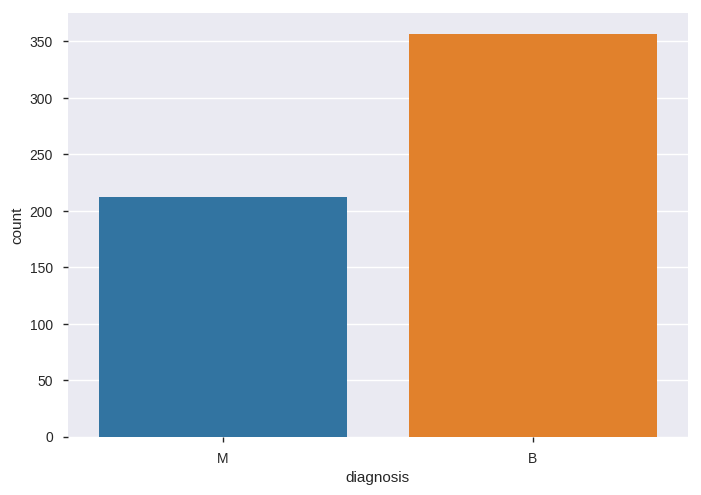

In [127]:
B, M = y.value_counts()
print(f'Number of benign: {B}')
print(f'Number of malignant: {M}\n')

ax = sns.countplot(y, label='Count')

### Data standardization

It's important that the data used, measure to the same scale, otherwise the data will be skewed towards the values that are higher or lower, even if the actual values, doesn't weight more (more important). As such the data is scaled around the mean and standard deviation, so that the mean and variance are preserved, but the data has the same range

In [128]:
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())

Displaying the standard deviation for benign vs malignant, this should make it easier to visualize the values extracted from above, even if it's now split into two categories M and B.

This plot will provide great insight into the seperation of features. This is especially useful for selecting features later

In [129]:
data = pd.concat([y, data_n_2.iloc[:,0:30]], axis=1)
data = pd.melt(data, id_vars='diagnosis', var_name='features', value_name='value')

plt.figure(figsize=(30,10))
sns.violinplot(x='features', y='value', hue='diagnosis', data=data, split=True, inner='quart')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

Now a few features can extracted an analyses to find correlation, and describe if the various features are useful together, contains a meaningful variance that describe the actual feature.

Let's try plotting the two features against each other

Concavity worst vs concave points worst

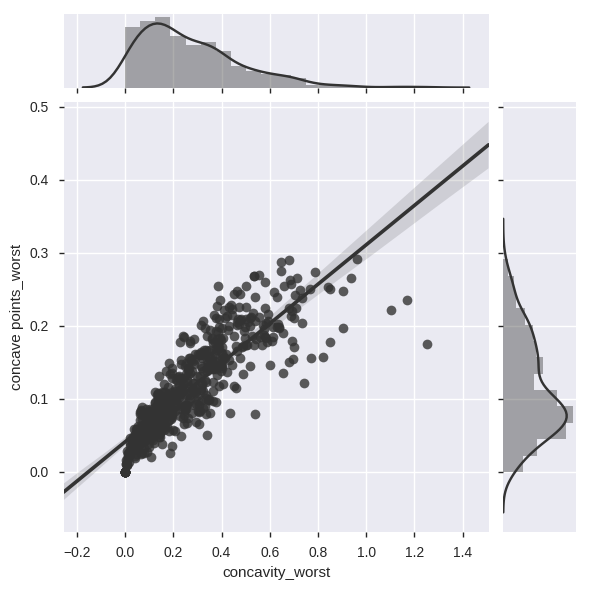

In [130]:
sns.jointplot(
    x.loc[:,'concavity_worst'], 
    x.loc[:,'concave points_worst'], 
    kind="regg", color="#333333"
)

As the plot shows, the points follow the same growth, this is visible via. the spread of the margin from the linear regression line (w. falloff). Except for some outliers, this plot (samples) would have a high correlation, as the points have the same variance and mean

In [131]:
np.corrcoef(x.loc[:,'concavity_worst'], x.loc[:,'concave points_worst'])

array([[1.        , 0.85543386],
       [0.85543386, 1.        ]])

As shown above, the correlation between the features are very high, as a value of 1 is a perfect match between the samples, and -1 is a perfect negative sample, and 0 is no correlation (no ability to form a straight line)

Now let's do a more in-depth analysis of some more features

In [132]:
sns.set(style="white")
df = x.loc[:, ['radius_worst','perimeter_worst','area_worst', 'concavity_worst', 'concave points_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

With a few more features, and a pairplot, now the variance is easy to see. Radius worst and perimeter worst would have a high correlation, as would radius_worst and area_worst, the same for perimeter worst and area_worst. These three are generally very correlated.

Now to show a very useful plot, the data distribution plot (swarm plot), this is especially useful for datasets with a small amount of samples

In [133]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())
data = pd.concat([y,data_n_2.iloc[:,0:30]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(30,10))

sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

This plot is extremely useful for seeing the data seperation and outliers. It's also clearly visible which models have the best speration for the diagnosis.

Now for some analysis of the correlation between the dataset. Certain values correlate perfectly with each other, these should be sorted out, only choosing one of them

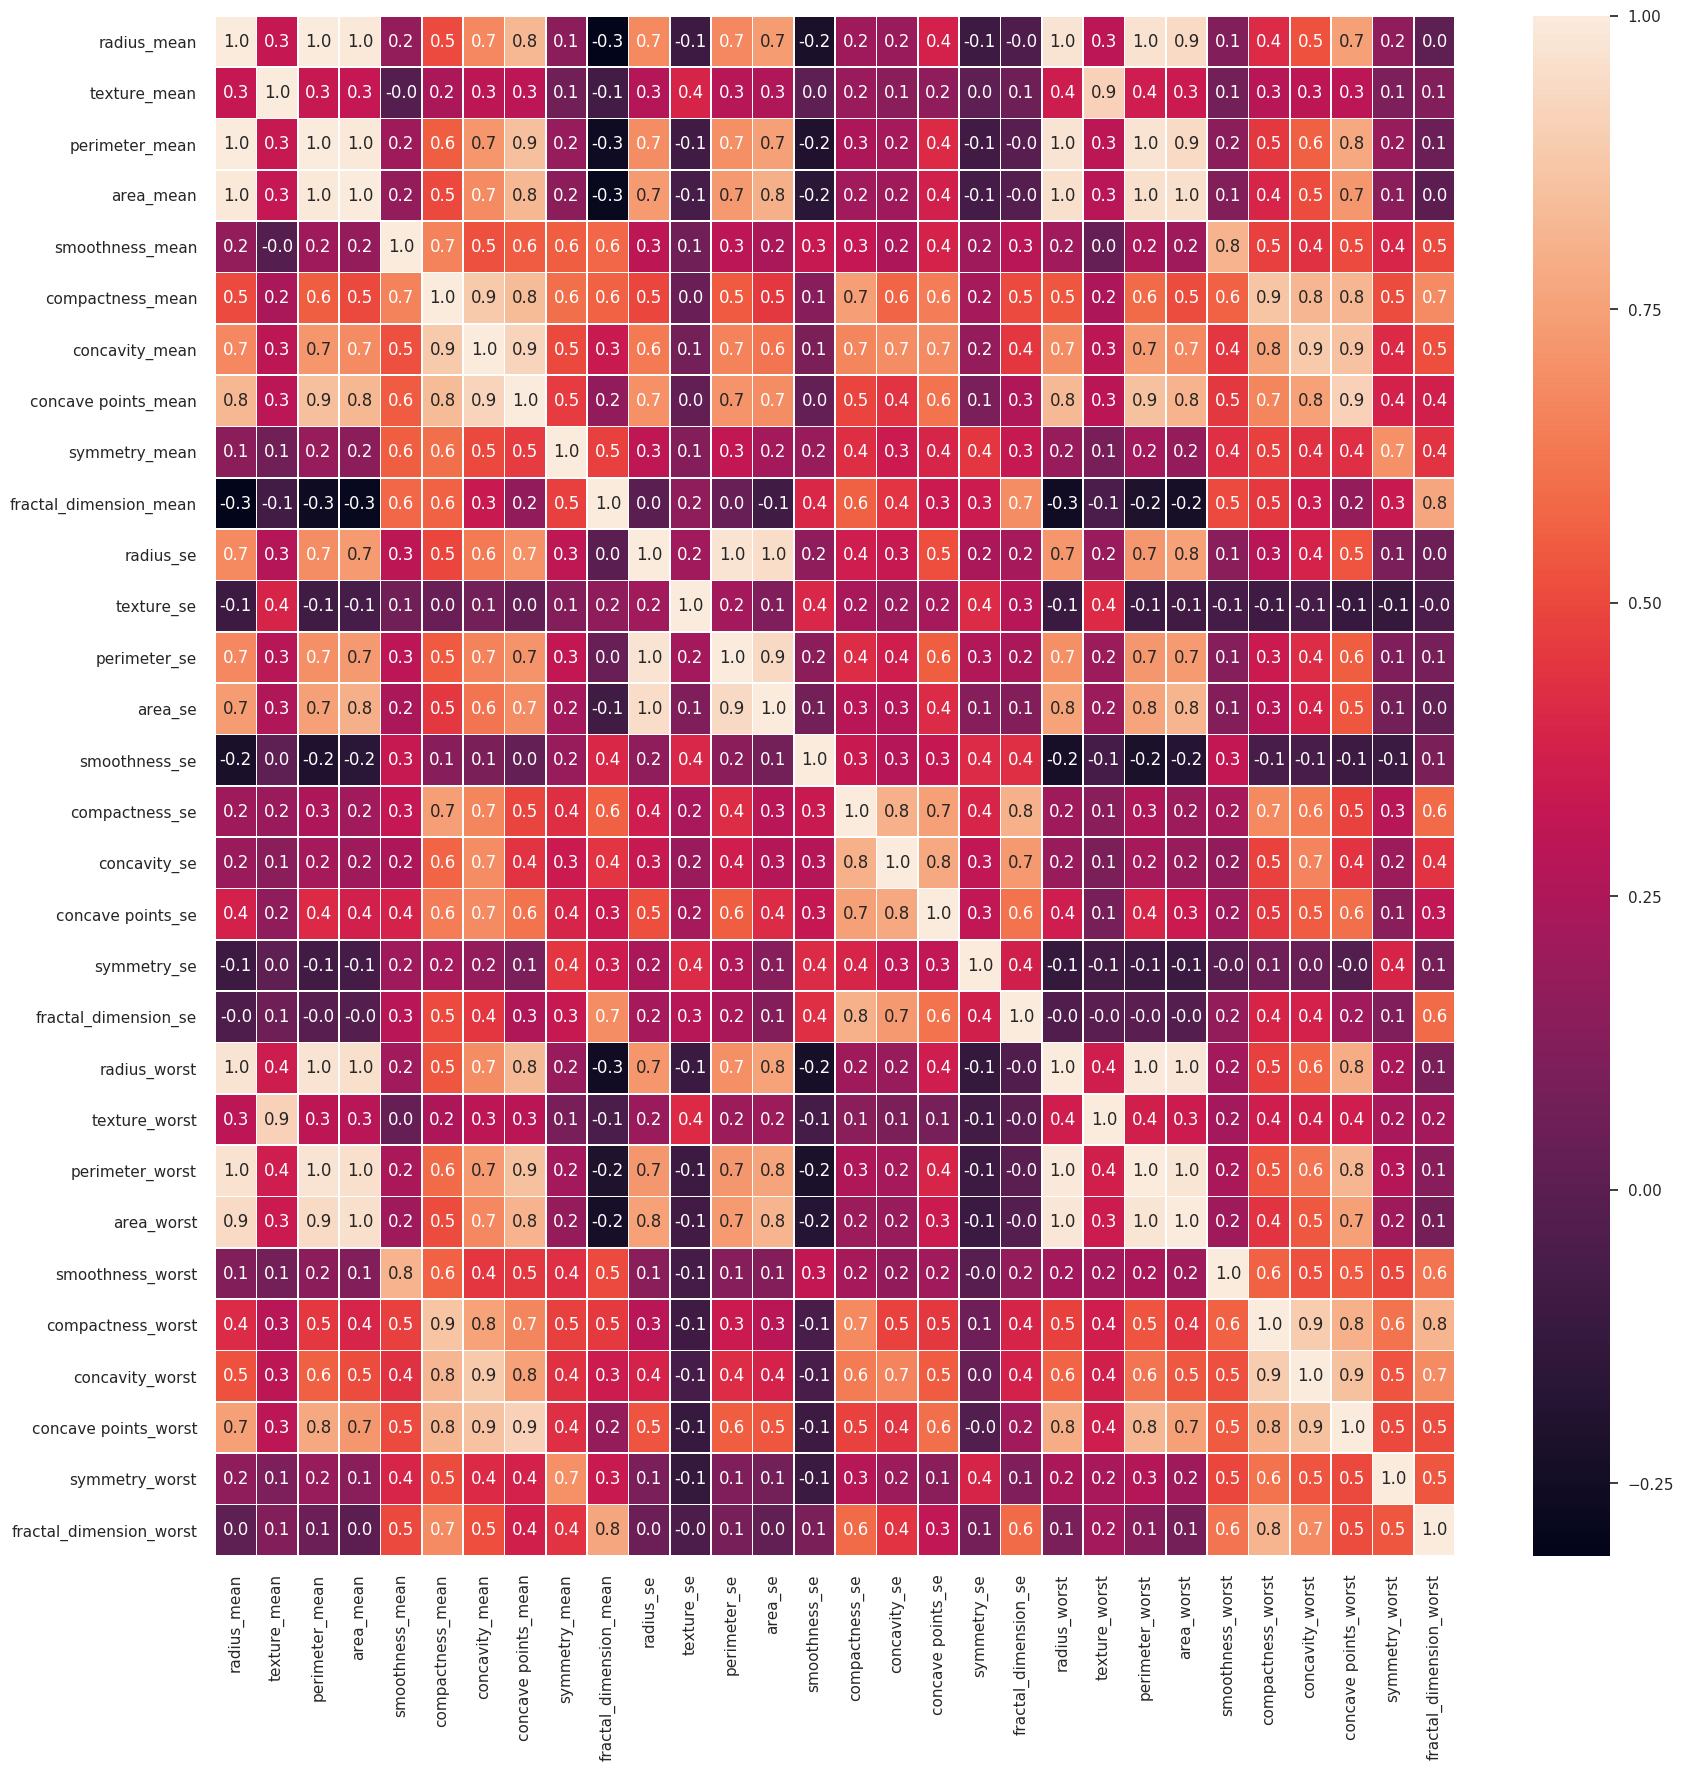

In [134]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

### Feature Selection

Dropping features other than those with a lower correlation

In [135]:
drop_list1 = ['perimeter_mean', 
              'radius_mean', 
              'compactness_mean', 
              'concave points_mean', 
              'radius_se', 
              'perimeter_se', 
              'radius_worst', 
              'perimeter_worst', 
              'compactness_worst', 
              'concave points_worst', 
              'compactness_se', 
              'concave points_se', 
              'texture_worst', 
              'area_worst']

x_1 = x.drop(drop_list1, axis=1)
x_1.head()

texture_mean  area_mean  smoothness_mean  concavity_mean  symmetry_mean  \
0         10.38     1001.0          0.11840          0.3001         0.2419   
1         17.77     1326.0          0.08474          0.0869         0.1812   
2         21.25     1203.0          0.10960          0.1974         0.2069   
3         20.38      386.1          0.14250          0.2414         0.2597   
4         14.34     1297.0          0.10030          0.1980         0.1809   

   fractal_dimension_mean  texture_se  area_se  smoothness_se  concavity_se  \
0                 0.07871      0.9053   153.40       0.006399       0.05373   
1                 0.05667      0.7339    74.08       0.005225       0.01860   
2                 0.05999      0.7869    94.03       0.006150       0.03832   
3                 0.09744      1.1560    27.23       0.009110       0.05661   
4                 0.05883      0.7813    94.44       0.011490       0.05688   

   symmetry_se  fractal_dimension_se  smoothness_worst  concavity_worst  \
0      0.03003              0.006193            0.1622           0.7119   
1      0.01389              0.003532            0.1238           0.2416   
2      0.02250              0.004571            0.1444           0.4504   
3      0.05963              0.009208            0.2098           0.6869   
4      0.01756              0.005115            0.1374           0.4000   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678

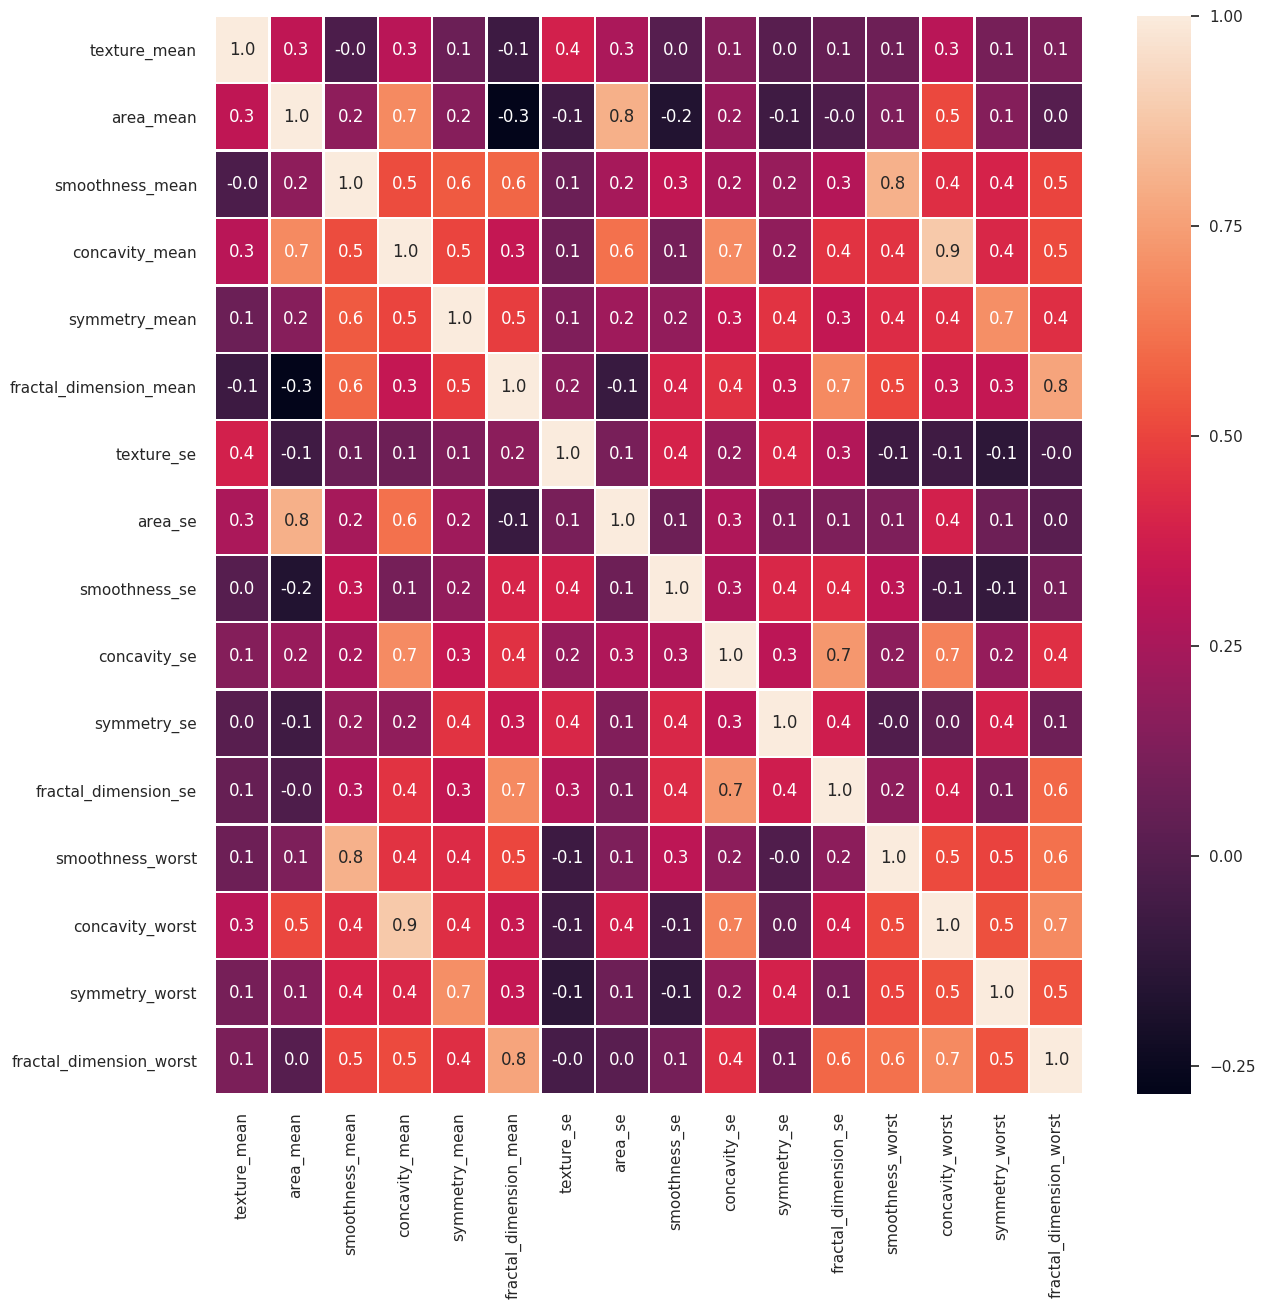

In [136]:
f, ax = plt.subplots(figsize=(14,14))
sns.heatmap(x_1.corr(), annot=True, ax=ax, linewidths=1, fmt='0.1f')

Now a set of features have been extracted, these doesn't correlate perfectly, as such there aren't any features that weight more than others.

## Selecting a Classifier

Now to actually train the ML model for the chosen features.

### Random Forest Classifier

RandomForest Classifier, works in the following way:

RandomForest creates a classification based on many weak estimations (decision trees) that come together as the majority, to form a strong estimator. This has various strengths, especially in the fact that most outliers are eliminated based on the rule of the majority. As such a Random forest, is a group of decision trees, that form the final model, based on input (voting) from many decision trees.

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

# split data train 70% test 30%
X_train, X_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

train_test_split is used for splitting the data set into two parts, the training set, and the test set. The train set is used to train the model, and the test set is used to extract a score (performance) of the model. The set is split into 70% training set and 30 for test. The values are also shuffled, so that the model won't conform to the indexes. This is the case for sets such as MNIST, which is initially sorted. 

random_state is set with an integer, this is to give it some controlled randomness, that can be reproduced, the 42 supplied is just a seed. By default train_test_split uses shuffle. Shuffle gives each row a random index (shuffling cards).

Stratify (default parameter) sets sub groups of the population according to labels, such as class labels

## Training the Classifier

### Testing the model

To test the model an example is set up

RandomForestClassifier with 10 decision trees and a seed for randomness

In [138]:
clf_rf = RandomForestClassifier(n_estimators=10, random_state=42) # default
clf_rf = clf_rf.fit(X_train, y_train)

Accuracy = 0.9590643274853801


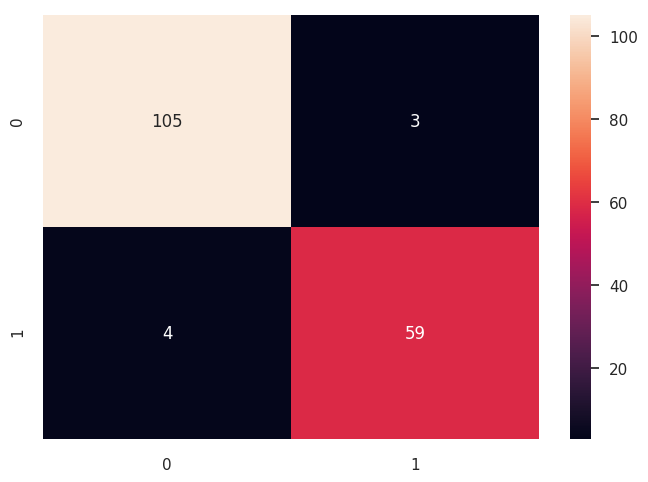

In [139]:
ac = accuracy_score(y_test, clf_rf.predict(X_test))
print('Accuracy =', ac)
cm = confusion_matrix(y_test, clf_rf.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d')

Overall this gives the score 0.96 ~ 96% right out of the box, this is pretty useful, already.

The way the score function works is that it matches the labels of the model with the test values, giving either a true, or if it doesn't match a false one. When all the values are compared, the true values are summed, against the false and the accuracy can be extracted. This score function requires, that the functions have the same labels as the original training set.

At last a confusion matrix is used, this prints the positive, false positive, negative and false negatives. From the model, it can be seen that we've got 7 false, positives and negatives. 

In [140]:
print("True values =", 1-((3+4)/(107+59)))

True values = 0.9578313253012049


This is by no means perfect, and optimization of hyper parameters can certainly be used to optimize the amount of trees, etc. to find the best model for this set.

### RFE

Recursive Feature Elimination is used to find out which features are the best features to create a model from. This is useful if the data set is large, so it can reduce the complexity immensely

In [141]:
from sklearn.feature_selection import RFE

clf_rf_2 = RandomForestClassifier(n_estimators=10) # 10 Decision trees
rfe = RFE(estimator=clf_rf_2, n_features_to_select=5, step=1) # Selecting the 5 best features
rfe = rfe.fit(X_train, y_train)

print('Chosen best features by rfe', X_train.columns[rfe.support_])

Chosen best features by rfe Index(['texture_mean', 'area_mean', 'concavity_mean', 'area_se',
       'concavity_worst'],
      dtype='object')


### RFECV

Recursive feature elemination and Cross validation
find the best features, and the optimal number of them.

In [142]:
from sklearn.feature_selection import RFECV

clf_rf_3 = RandomForestClassifier(n_estimators=10)
rfecv = RFECV(estimator=clf_rf_3, step=1, cv=5, scoring='accuracy')

rfecv.fit(X_train, y_train)

print('Optimal number of features =', rfecv.n_features_)
print('Best features =', X_train.columns[rfecv.support_])

Optimal number of features = 15
Best features = Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'area_se', 'smoothness_se',
       'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


Now to plot the optimal number of features against the cross validation score

In [143]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score of number of selected features')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

### Tree based feature selection


This will rank the features, from most important to least. This is gained from the importances

Feature ranking =
1. feature 1 (0.285303)
2. feature 3 (0.182965)
3. feature 7 (0.143827)
4. feature 14 (0.109826)
5. feature 13 (0.084835)
6. feature 0 (0.036597)
7. feature 9 (0.035846)
8. feature 12 (0.022923)
9. feature 2 (0.019209)
10. feature 11 (0.016194)
11. feature 10 (0.015159)
12. feature 8 (0.014361)
13. feature 5 (0.011349)
14. feature 6 (0.008950)
15. feature 15 (0.007793)
16. feature 4 (0.004862)


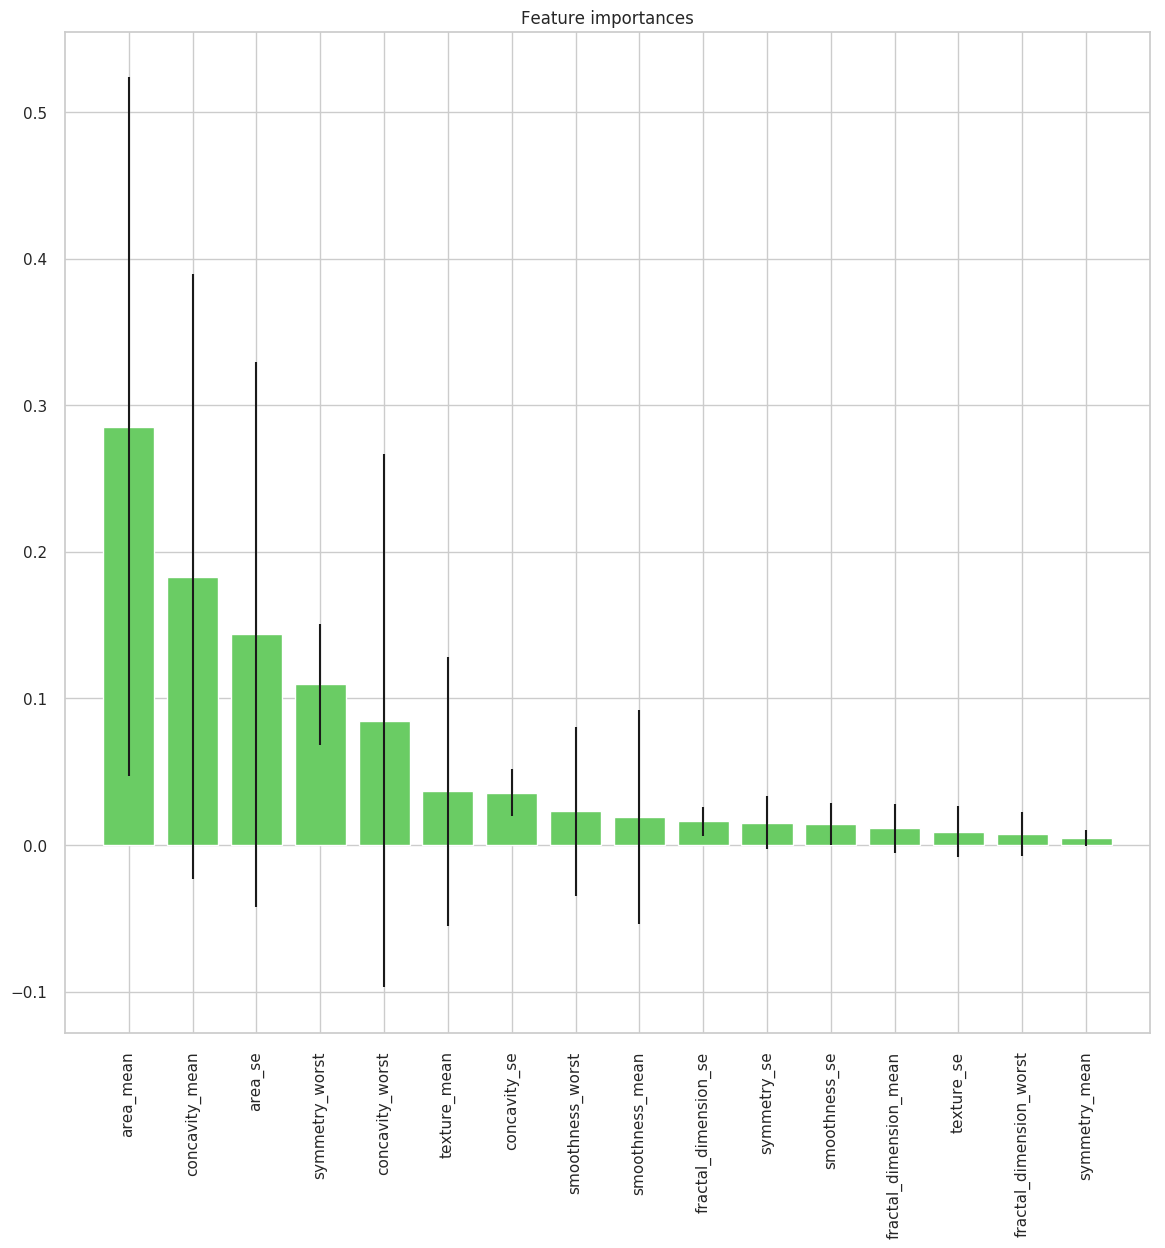

In [144]:
clf_rf_4 = RandomForestClassifier(n_estimators=10) # 10 decision trees
clf_rf_4 = clf_rf_4.fit(X_train, y_train)
importances = clf_rf_4.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print('Feature ranking =')

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## Running PCA

In [145]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# normalization

X_train_N = (X_train-X_train.mean())/(X_train.max()-X_train.min())
X_test_N = (X_test-X_test.mean())/(X_test.max()-X_test.min())

Text(0, 0.5, 'explained_variance_ratio_')

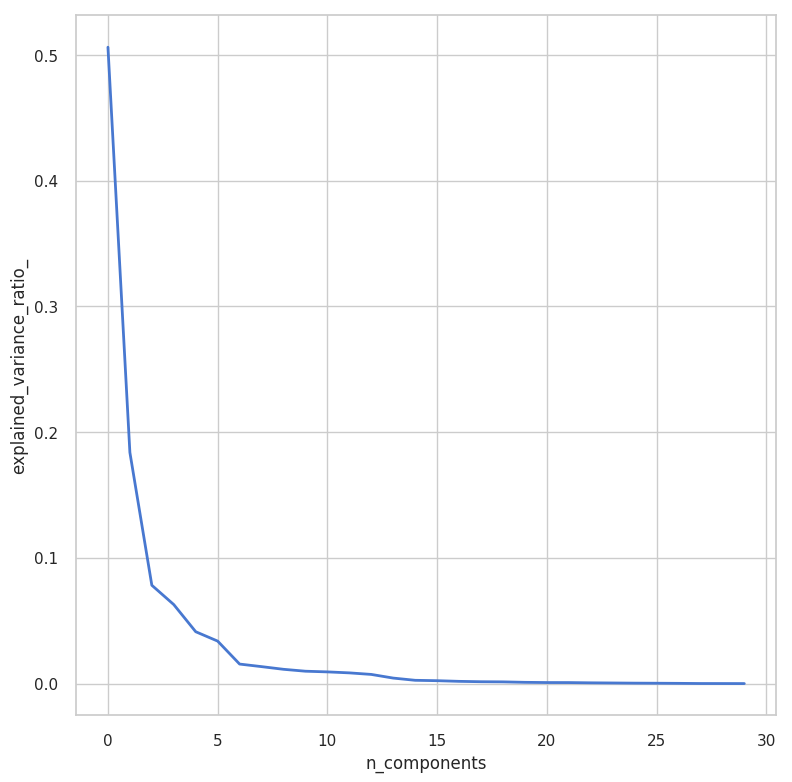

In [146]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_N)

plt.figure(1, figsize=(10,10))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

### Choosing hyper parameters

- n_estimators
  - number of trees in the forest
- max_features
  - the number of features to consider when looking for the best split
- criterion
  - The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.
- max_depth
  - How max dept of a tree
- min_samples_split
  - The minimum number of samples required to split an internal node
- min_samples_leaf
  - The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

In [147]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [4, 6, 9, 10, 15, 20, 30], 
     'criterion': ['entropy', 'gini'],
    'max_depth': [2, 3, 5, 10],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 5, 8]
}

grid = GridSearchCV(clf_rf_4, parameters, cv=5, iid=True)
grid = grid.fit(X_train, y_train)

# set the clf_rf_4 to the best combination of parameters
clf_rf_4 = grid.best_estimator_

clf_rf_4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [148]:
y_pred = clf_rf_4.predict(X_test)

In [149]:
from sklearn import metrics

acc_rf = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)

print( 'Accuracy of Random Forest model :', acc_rf )

Accuracy of Random Forest model : 96.49


### Alternative algorithms

It's time to check out some other algorithms, such as SVM

#### Support Vector Machine

The objective of the support vector machine, is to find a hyperplane in an N-dimensional space, where N is the number of features, that distincly classifies the data points.


In [150]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [151]:
from sklearn import svm

svc = svm.SVC()

parameters = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

grid = GridSearchCV(svc, parameters, cv=3)
grid = grid.fit(X_train, y_train)

svc = grid.best_estimator_

svc.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [152]:
# Prediction on test data
y_pred = svc.predict(X_test)

acc_svm = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
print( 'Accuracy of SVM model :', acc_svm )

Accuracy of SVM model : 97.66


SVM actually gives the best score for this model. It might be because of how the models can be built.

## Deep learning

We are exploring the fields of deep learning by looking at Keras which is a top-level neural network API extending some lower-level API's like Tensorflow. Because Keras is a top-level API it is easier to work with and therefore a good choice for inexperienced deep learning explorers, like ourselves.

Deep learning is a special branch of the Machine Learning tree where algorithms are inspired by the the neural structure of the biological human brain. The deep learning technique is widely used in situations where we need to teach computers to act as a human would do naturally.

To replicate the biological neural network present in the human brain, an artificial neural network is introduced. The artificial neural network is basically a computational model where the ANN structure is changing based on the flow of information in the model. Where the typical procedure in Machine Learning would be (1) input, (2) feature extraction, (3) classification and (4) output, in deep learning the feature extraction and classification procedure is combined in the same step.

### Backpropagation

The concept of doing a "backward propagation of errors" is actually an algorithm within the supervised learning domain. The algorithm is used for learning in artifical neural networks with gradient decent. The gradient of an error function is calculated in relation to the neural network weights.

A well known example that explains the concept of gradient decent very well is as follows: 

<i>Suppose you are at the top of a mountain, and you have to reach a lake which is at the lowest point of the mountain. A twist is that you are blindfolded and you have zero visibility to see where you are headed. So, what approach will you take to reach the lake? The best way is to check the ground near you and observe where the land tends to descend. This will give an idea in what direction you should take your first step. If you follow the descending path, it is very likely you would reach the lake. Inspiration source: https://www.analyticsvidhya.com/blog/2017/03/introduction-to-gradient-descent-algorithm-along-its-variants/</i>

In the following section we will explore Breast Cancer Wisconsin Data Set with a deep learning approach. We will predict whether the cancer is benign or malignant.

First we need to prepare our data.

In [153]:
# Read the data
data = pd.read_csv('input/data/data.csv')

# Delete the unnamed data col
del data['Unnamed: 32']

# Locate the data we want to use
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Encode categorical data
from sklearn.preprocessing import LabelEncoder
le_X_1 = LabelEncoder()
y = le_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

With our data well prepared we now need to import the Keras package an specify an artificial neural network.

In [154]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

ann = Sequential()

We now need to add the input layer and the first hidden layer. We need to add dropout to the ANN in order to prevent overfitting.

In [155]:
ann.add(Dense(16, kernel_initializer='uniform', activation='relu', input_dim=30))
ann.add(Dropout(rate=0.9))

The last parameter of the Dense function represents the input dimensions of the data set (the number og cols). The first parameter represents the output dimensions (the number of outputs fed to the next layer).
The activation parameter represents the activation function which in our case is ReLU. The kernel_initializer parameter is determening the way in which the weights is provided to the artificial neural network. 

The ReLU function is f(x)=max(0,x). The ReLU function is used to speed up the training because the gradient computation is very simple. Depending on the sign of "x" ReLU wil pass either 0 or 1. Also any negative values will be set to 0, and therefore all the positive values are processed more quickly as the training goes on. By using the ReLU function we should be aware og so called "dead neurons".
<i>Inspiration source: https://stats.stackexchange.com/questions/226923/why-do-we-use-relu-in-neural-networks-and-how-do-we-use-it</i>

We will now add a second hidden layer and an output layer. 

In [156]:
# Second hidden layer
ann.add(Dense(16, kernel_initializer='uniform', activation='relu'))
ann.add(Dropout(rate=0.9))

# Output layer
ann.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

Notice that we are using a different activation function for the output layer. We are also setting the output dimension to 1 as we only want one output from the final layer. The Sigmoid function is used when we in some cases have to deal with classification problems with results of two different types.

We now want to compile the artificial neural network.

In [157]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

The optimizer for our ANN is "adam" for Gradient Descent and the loss parameter represents with loss function we want to use.
Crossentropy measures the performance of the classifier where the output is a probability score (a number between 0 or 1).
<i>Inspiration source: https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html</i>

In the following code section we will try to fit the neural netowrk to the training set.

In [164]:
ann.fit(X_train, y_train, batch_size=100, epochs=130)

Epoch 1/130
398/398 [==============================] - 0s 14us/step - loss: 0.4720 - acc: 0.7161
Epoch 2/130
398/398 [==============================] - 0s 15us/step - loss: 0.4744 - acc: 0.6985
Epoch 3/130
398/398 [==============================] - 0s 13us/step - loss: 0.4747 - acc: 0.7085
Epoch 4/130
398/398 [==============================] - 0s 9us/step - loss: 0.4456 - acc: 0.7085
Epoch 5/130
398/398 [==============================] - 0s 16us/step - loss: 0.4884 - acc: 0.7337
Epoch 6/130
398/398 [==============================] - 0s 17us/step - loss: 0.4593 - acc: 0.7211
Epoch 7/130
398/398 [==============================] - 0s 17us/step - loss: 0.4736 - acc: 0.7211
Epoch 8/130
398/398 [==============================] - 0s 25us/step - loss: 0.4869 - acc: 0.7136
Epoch 9/130
398/398 [==============================] - 0s 26us/step - loss: 0.4346 - acc: 0.7161
Epoch 10/130
398/398 [==============================] - 0s 13us/step - loss: 0.4670 - acc: 0.7085
Epoch 11/130
398/398 [========

Now that the data is fitted to the ANN we can go on and predict the results from the test set and calculate the accuracy score.

In [159]:
from sklearn.metrics import accuracy_score

y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

ac = accuracy_score(y_test, y_pred)
print('Accuracy =', ac*100)

Accuracy = 96.49122807017544


Further more we can produce a heatmap showing how well the training went.

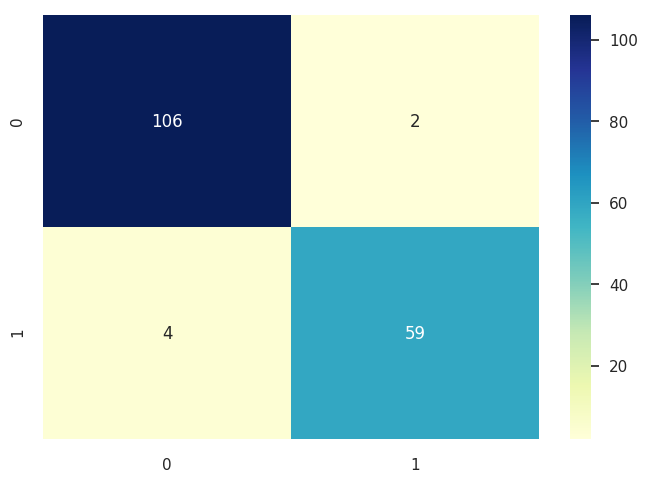

In [160]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='1')
plt.savefig('output/deeplearningHeatmap.png')

We can verify the accuracy score by calculating it manually using the information from the confusion matrix.

In [161]:
total_no_of_values = 171;
TP = cm[0][0]
TN = cm[1][1]

ac2 = (((TP+TN)/total_no_of_values)*100)
print('Accuracy =', ac2)

Accuracy = 96.49122807017544


From the confusion matrix we see that we only have 2 false-positives and 4 false-negatives out of a sample size of 171 which leads to relatively high accuracy score. So based on the breast cancer data set our machine is now able to predict if a patients cancer is benign or malignant.

## Results

From above it's possible to see that an accuracy of ~96% has been gained, which is a fairly good representation of the dataset training vs testing

# Discussion

In this project, two different strategies were used, one with machine learning and the other deep-learning. First of all the data was analyzed and split according to correlation analysis and then features were selecting, first for the random forest classifier, and later for the support vector machine. These gave various results, between 95% - 98%, varying on the randomness of the generation. The deep learning model, gave a model of about 96% - 97% accuracy, which also isn't bad. But also quite complex to use, even if the network handles most of the hard work. As such it can be said, that there isn't much of a difference between the the models, even if the SVM gave the best results, it's fairly marginal. 

The set itself was quite easy to work with, only some preprocessing had to take place, and a bit of scaling, but all in all, it's quite easy to use. Especially as there is a clear objective, finding out if a tumor is malignant or bening.

# Conclusion

The two different model have been setup, with an accuracy above the 95% from the hypothesis, meaning that hypothesis 1 & 2, is enough to reject the null-hypothesis, for this training set. This concludes the journal, as all the steps have been followed, the initial dataset has been introduced to the notebook, worked with, by preprocessing, analysed, features extracted, model fitted, scored, compared against each other. Overall the result came out that SVM was the best classifier for the job, with an impressive 98% accuracy, even better than the somewhat limited amount of data points for the neural network. 

# Individual contributions & conclusions

## Kasper J. Hermansen

au557919 | 201607110

### Contribution

I worked primarily on getting the data, preprocessing it, visualizing it, selecting features, extracting features, fitting the Machine learning models (RFC & SVM) and scored them.

### Conclusion

I have worked primarily with the analysis and preprocessing of the dataset, which has been a great experience. It's crazy how much insight can be gained from the various plots, for example, in the start of the project, the standard deviation was gained from all the features, this itself, while smart, is not that useful. Later a heatmap and swarmplot was used, to identify correlation and data distribution for each of the features. This gave massive insight into which features was the best to take. Especially in the later part, where the recursive feature extraction tool was used. The output was clear, when looking back at the plots. It's always fun to handle the complexity of a model, with a nice hyperparameter selection, it's possible to tune the model, almost perfectly. This is extremely fun, as it gives a form of control over the results, where the optimization is complete.


## Sameer Ahmad Habibi

au543939 | 201606697

### Contribution

I have worked primarily on Body with preparing the data and data exploration, where I worked with Pandas Proiling Report wich is involved in drawing histograms of all variables.

### Conclusion

The project is about understanding features in relation to predict breast cancer from the data set. Based on feature analysis, there are few features with more predictive value for diagnosis. Using PCA analysis, these observations were confirmed, showing that the same features are aligned to main principal component. These features are concave.ponts_worst, concavity_mean, concavity_worst, perimeter_worst, area_worst. With a reasonable accuracy we could predict malignant (M) and benign (B) tumors based on the model Random Forest. Therefore, I can conclude from the above analysis that the model provides good accuracy in order to predict breast cancer from the data set, therefore all exploration in relation to the data set was good for this purpose. 


## Anton Brix Torø

au222852 | 201600315

### Contribution

I contributed to the project by working primarily on the Body section where my task was to implement, describe and examine a Deep Learning model for the chosen dataset. 

### Conclusion

As stated in the contribution section I have worked primarily on the Deep Learning section of this project. As Deep Learning is a fairly complex area, lots of time where used by studying (and re-studying) the different Deep Learning methods. I discovered that Deep Learning is strongly technique-focused and that there isnt much concrete explanations to find. 
I chose to work with Keras which is a high-level neural networks API, capable of running on top of Tensorflow, Theano, and CNTK, and therefore is less complex. The easiest way to create a model in Keras is by using the sequential API, which lets you stack one layer after the other. I used this technique and managed to succesfully create an Artifical Neural Network (ANN) from the breast cancer dataset. Through the process of adding layers I used the ReLU activation function to speed up the training, I used the Cross-entropy loss function when compiling the ANN to measure the performance of the classifier, and finally i was able to fit the neural network to the training set, predict the results from the test set and calculate an accuracy score.
Taking the task of working with the Deep Learning area of this project where both challenging and fun. Eventhough I didn't fullfill my goal of working with a more complex Deep Learning method I am satisfied that we ended up with a working neural network for predicting if a tumor is malignant or bening.

# Appendix

In [162]:
pandas_profiling.ProfileReport(data)